In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 25.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [3]:
file_path1 = os.path.join(path,'Titanic-Dataset.csv')

df = pd.read_csv(file_path1)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_pclass_survival = df[df['Survived'] == 1]


print(df_pclass_survival.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


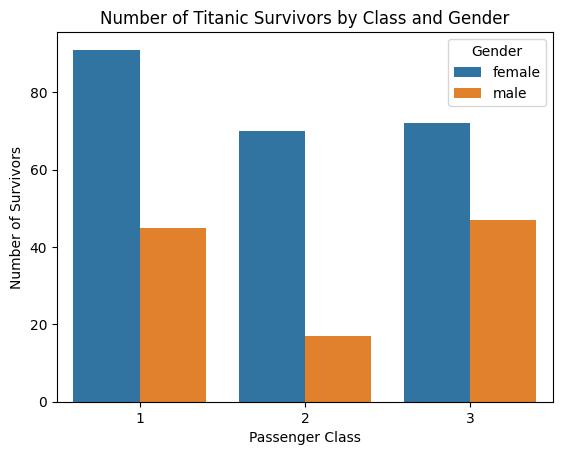

In [5]:
sns.countplot(data = df_pclass_survival,x='Pclass',hue='Sex')
plt.title('Number of Titanic Survivors by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Gender')
plt.show()

         Survived
Pclass           
1       62.962963
2       47.282609
3       24.236253


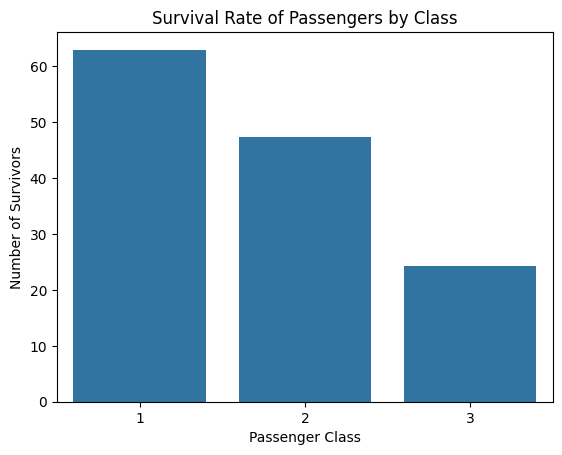

In [6]:
df_pclass_survival1 = df[['Pclass','Survived']].groupby('Pclass').mean() * 100

print(df_pclass_survival1.head(10))

sns.barplot(data=df_pclass_survival1,x='Pclass',y='Survived')
plt.title('Survival Rate of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()

               total_passengers  survivors  survival_rate
Pclass Sex                                               
1      female                94         91      96.808511
       male                 122         45      36.885246
2      female                76         70      92.105263
       male                 108         17      15.740741
3      female               144         72      50.000000
       male                 347         47      13.544669


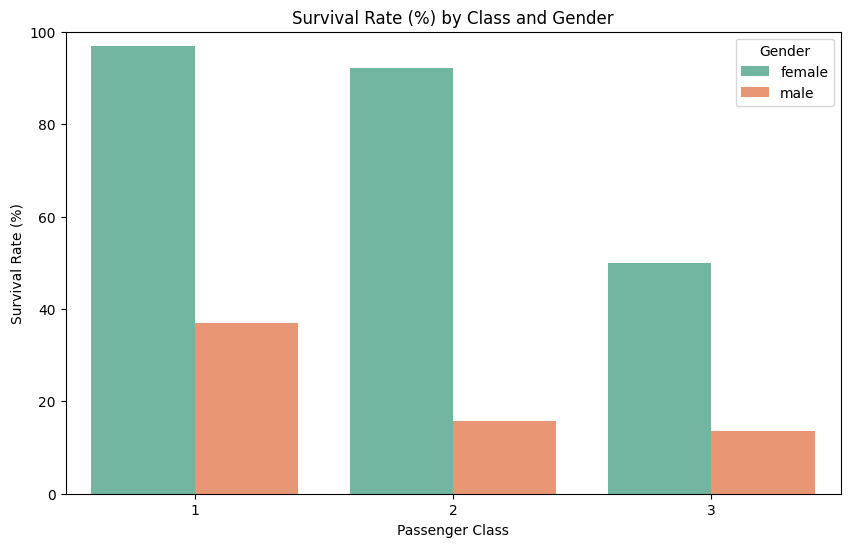

In [7]:
df_survival_sex = df.groupby(['Pclass','Sex'])['Survived'].agg(
    total_passengers='count',
     survivors='sum'
)

df_survival_sex['survival_rate'] = (df_survival_sex['survivors'] / df_survival_sex['total_passengers']) * 100

print(df_survival_sex)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_survival_sex, x='Pclass', y='survival_rate', hue='Sex', palette='Set2')

plt.title('Survival Rate (%) by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.show()

In [8]:
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


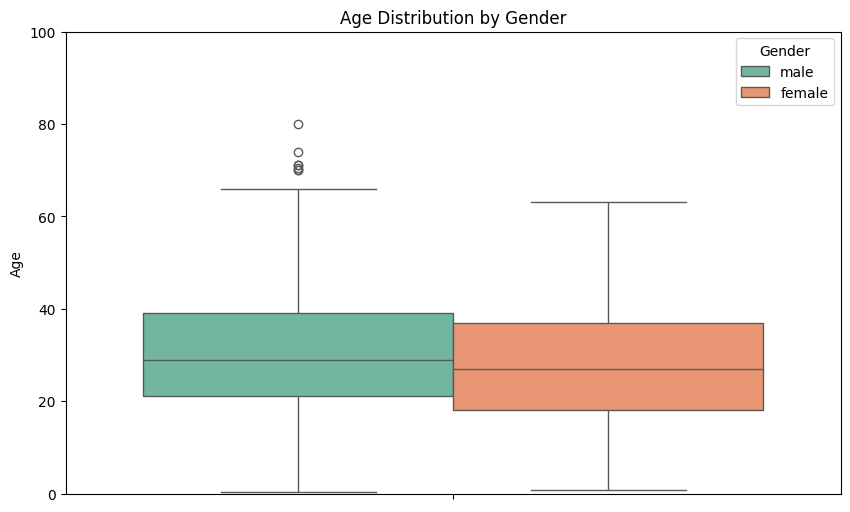

In [32]:
df_age = df[['Age','Pclass','Sex','SibSp','Parch']]
# df_survival_sex['survival_rate'] = (df_survival_sex['survivors'] / df_survival_sex['total_passengers']) * 100

# print(df_survival_sex)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_age, y='Age', hue='Sex', palette='Set2')

plt.title('Age Distribution by Gender')
plt.ylabel('Age')
# plt.ylabel('Age')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.show()

# sns.boxplot(data=df['Age'],hue=)


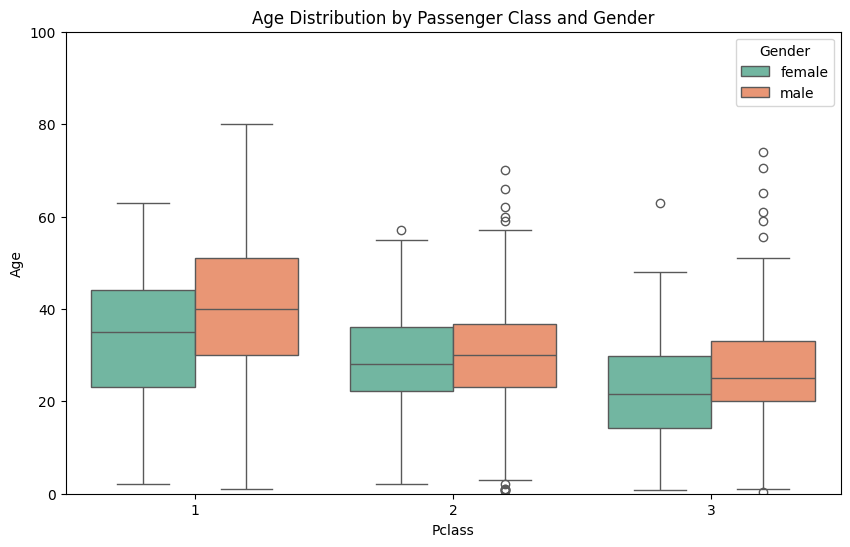

In [37]:
df_age = df[['Age','Pclass','Sex','SibSp','Parch']]
# df_age['survival_rate'] = (df_survival_sex['survivors'] / df_survival_sex['total_passengers']) * 100

# print(df_survival_sex)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_age, y='Age', x='Pclass' ,hue='Sex', palette='Set2')

plt.title('Age Distribution by Passenger Class and Gender')
plt.ylabel('Age')
# plt.ylabel('Age')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.show()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

/tmp/ipython-input-41-2622145855.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_grouped = df.groupby(['AgeBin', 'Sex'])['Survived'].agg(


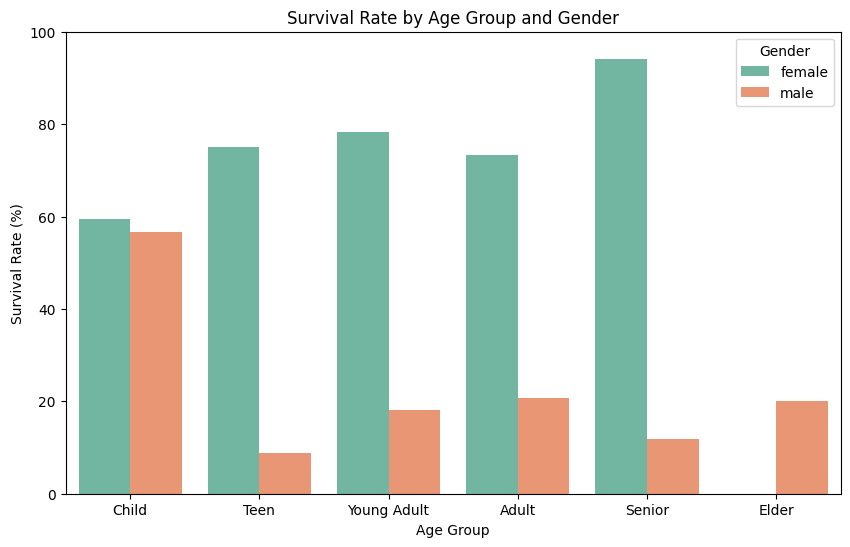

In [41]:
# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 70, 100],
                      labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])
print(df)

# Group by age bin and sex
df_age_grouped = df.groupby(['AgeBin', 'Sex'])['Survived'].agg(
    total_passengers='count',
    survivors='sum'
).reset_index()

# Calculate survival rate
df_age_grouped['survival_rate'] = (df_age_grouped['survivors'] / df_age_grouped['total_passengers']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=df_age_grouped, x='AgeBin', y='survival_rate', hue='Sex', palette='Set2')

plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.show()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

/tmp/ipython-input-44-3761127704.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_grouped = df.groupby(['AgeBin', 'Sex','Pclass'])['Survived'].agg(


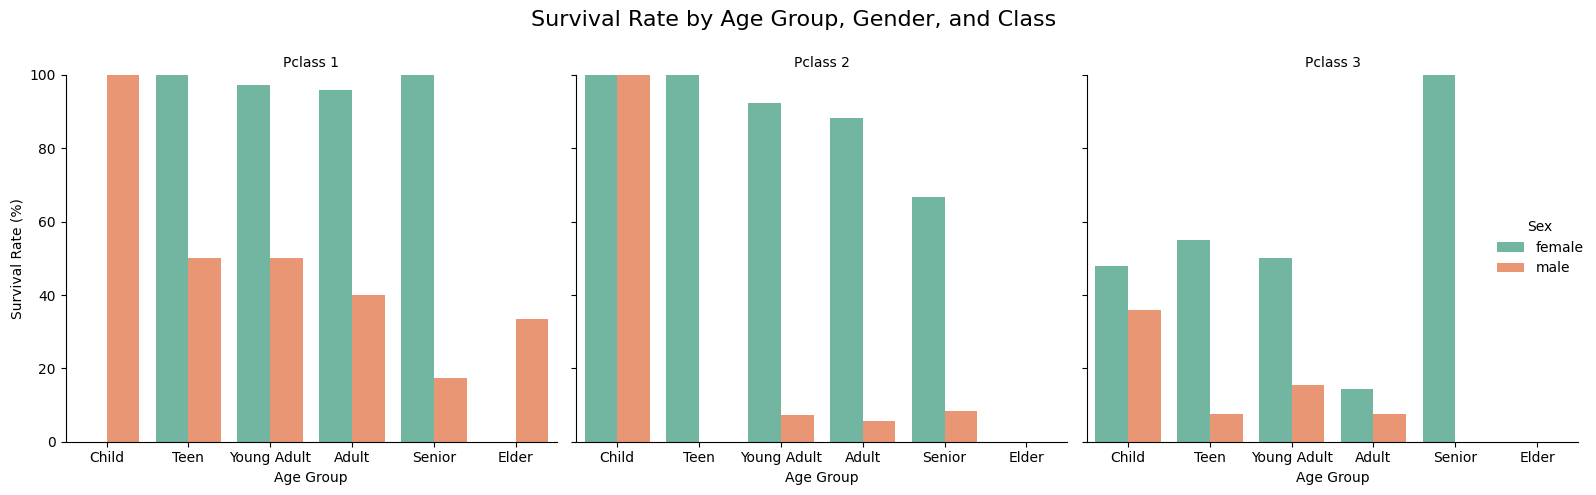

In [44]:
# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 70, 100],
                      labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])
print(df)

# Group by age bin and sex
df_age_grouped = df.groupby(['AgeBin', 'Sex','Pclass'])['Survived'].agg(
    total_passengers='count',
    survivors='sum'
).reset_index()

# Calculate survival rate
df_age_grouped['survival_rate'] = (df_age_grouped['survivors'] / df_age_grouped['total_passengers']) * 100

g = sns.catplot(
    data=df_age_grouped,
    x='AgeBin', y='survival_rate',
    hue='Sex', col='Pclass',
    kind='bar', palette='Set2',
    height=5, aspect=1
)

g.set_titles("Pclass {col_name}")
g.set_axis_labels("Age Group", "Survival Rate (%)")
g.fig.suptitle("Survival Rate by Age Group, Gender, and Class", fontsize=16)
g.set(ylim=(0, 100))
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

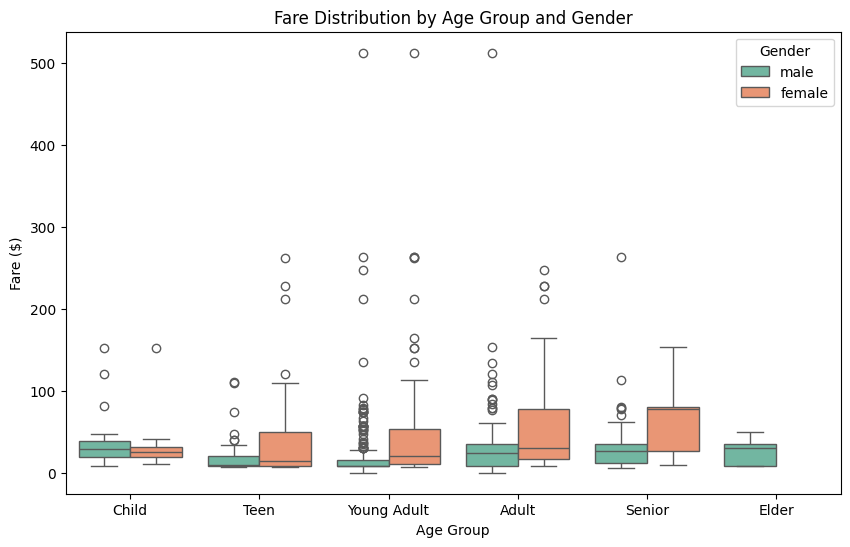

In [55]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 70, 100],
                      labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Fare', x='AgeBin', hue='Sex', palette='Set2')

plt.title('Fare Distribution by Age Group and Gender')
plt.ylabel('Fare ($)')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()

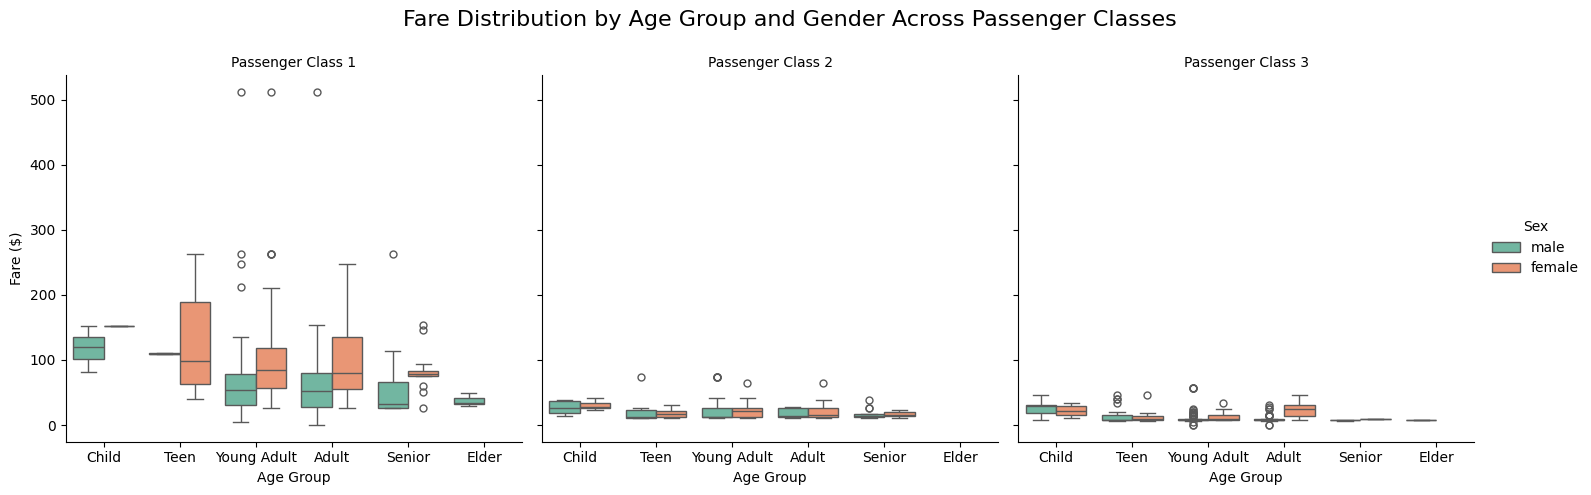

In [59]:
# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 70, 100],
                      labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])


g = sns.catplot(
    data=df,
    x='AgeBin', y='Fare',
    hue='Sex', col='Pclass',
    kind='box', palette='Set2',
    height=5, aspect=1
)

g.set_titles("Passenger Class {col_name}")
g.set_axis_labels("Age Group", "Fare ($)")
g.fig.suptitle("Fare Distribution by Age Group and Gender Across Passenger Classes", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()